In [1]:
import numpy as np
import matplotlib.pyplot as plt

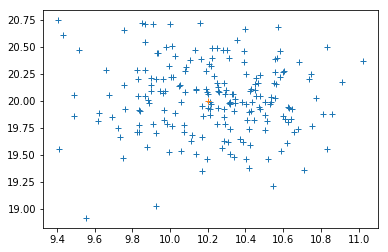

In [16]:
n_iter = 200
dim = 2
sz = (n_iter, dim)
x_true = (10.2, 20)
z_cov = [[0.1,0],[0,0.1]] # 两个变量没有关系
z = np.random.multivariate_normal(x_true, z_cov, size=sz[0]) # 观测值服从二维高斯分布
plt.plot(z[:,0], z[:,1], '+') # n_iter次观察值的分布
plt.plot(*x_true, '+')

In [17]:
Q = np.array([[1e-5, 0], [0, 1e-5]]) # 估计模型的误差矩阵
xhat = np.zeros(sz)
P = np.zeros((n_iter, dim, dim)) # 误差协方差矩阵，度量估计准确度
xhat_ = np.zeros(sz) #
P_ = np.zeros((n_iter, dim, dim))
K = np.zeros((n_iter, dim, dim))

R = np.array([[0.1**2,0],[0,0.1**2]]) # 观测噪声的协方差矩阵
H = np.array([[1,0], [0,1]])

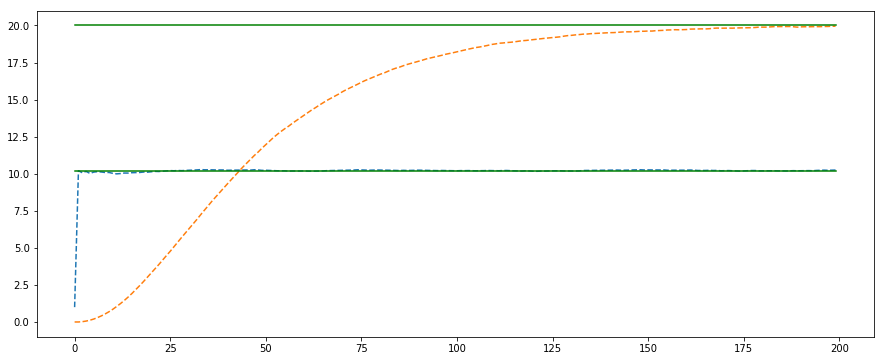

In [24]:
# init
xhat[0]=[1,0]
P[0]=[[1,0],[0,0]]

for k in range(1, n_iter):
    xhat_[k] = xhat[k-1]
    P_[k] = P[k-1] + Q
    
    # 更新
    y_k = z[k] - np.dot(xhat_[k], H)
    S_k = np.dot(np.dot(H, P[k-1]), H.T) + R
    K[k] = np.dot(np.dot(P[k-1], H.T), np.linalg.inv(S_k))
    
    xhat[k] = xhat_[k] + np.dot(K[k], y_k)
    P[k] = np.dot((np.identity(dim) - np.dot(K[k], H)), P_[k])

plt.figure(figsize=(15,6))    
plt.plot(xhat, linestyle='--')
plt.plot(np.array([x_true[0] for i in range(n_iter)]), color='green')
plt.plot(np.array([x_true[1] for i in range(n_iter)]), color='green')